
The Speed data and TMC data is imported then data for forbes avenue for eastbound and westbound is filtered out

In [6]:
import pandas as pd
traf = pd.read_csv('Forbes-Project.csv')
TMC = pd.read_csv('TMC_Identification_REVISED.csv')

In [7]:
forbes = TMC.loc[TMC.road == 'FORBES AVE',:]
traf = traf.loc[traf.confidence_score >= 30 , :]

In [8]:
traf.rename(columns={'tmc_code':'tmc'}, inplace = True)

In [9]:
main = pd.merge(forbes,traf,on= 'tmc', how = 'inner')

In [10]:
EST = main.loc[main.direction == 'EASTBOUND',:]
WST = main.loc[main.direction == 'WESTBOUND',:]

In [11]:
EST.rename(columns={'measurement_tstamp':'Date'}, inplace=True)
WST.rename(columns={'measurement_tstamp':'Date'}, inplace=True)

C:\python\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [12]:
import datetime as dt
EST['Date'] = pd.to_datetime(EST['Date'])
WST['Date'] = pd.to_datetime(WST['Date'])


C:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
##The Data is grouped for every 15 minutes and average is calculated.
EST = EST.groupby(pd.Grouper(key = 'Date',freq = '30T')).mean()
WST = WST.groupby(pd.Grouper(key = 'Date',freq = '30T')).mean()

In [14]:
EST = EST.reset_index()
WST = WST.reset_index()

In [15]:
import datetime
t1a = pd.to_datetime('1-1-2017')
t1 = pd.to_datetime('3-7-2018')
t2 = pd.to_datetime('5-21-2018')
t3 = pd.to_datetime('8-14-2018')
t4 = pd.to_datetime('3-22-2019')
t5 = pd.to_datetime('04-06-2019')

In [16]:
## The data is split into different period
traf1a = EST[EST["Date"].between(t1a,t1)]
traf1= EST[EST["Date"].between(t1,t2)]
traf2 = EST[EST["Date"].between(t2,t3)]
traf3 = EST[EST['Date'].between(t3,t4)]
traf4 = EST[EST['Date'].between(t4,t5)]
traf5a = WST[WST["Date"].between(t1a,t1)]
traf5=  WST[WST["Date"].between(t1,t2)]
traf6 = WST[WST["Date"].between(t2,t3)]
traf7 = WST[WST['Date'].between(t3,t4)]
traf8 = WST[WST['Date'].between(t4,t5)]


In [17]:
import datetime as dt
traf1a['mins'] = traf1a['Date'].dt.time
traf1['mins'] = traf1['Date'].dt.time
traf2['mins'] = traf2['Date'].dt.time
traf3['mins'] = traf3['Date'].dt.time
traf4['mins'] = traf4['Date'].dt.time
traf5a['mins'] = traf5a['Date'].dt.time
traf5['mins'] = traf5['Date'].dt.time
traf6['mins'] = traf6['Date'].dt.time
traf7['mins'] = traf7['Date'].dt.time
traf8['mins'] = traf8['Date'].dt.time

C:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pa

In [18]:
##The average every 15mins is calculated for all the days
avg1 = traf1.groupby('mins').speed.mean()
avg1a = traf1a.groupby('mins').speed.mean()
avg2 = traf2.groupby('mins').speed.mean()
avg3 = traf3.groupby('mins').speed.mean()
avg4 = traf4.groupby('mins').speed.mean()
avg5a = traf5a.groupby('mins').speed.mean()
avg5 = traf5.groupby('mins').speed.mean()
avg6 = traf6.groupby('mins').speed.mean()
avg7 = traf7.groupby('mins').speed.mean()
avg8 = traf8.groupby('mins').speed.mean()


In [19]:
print(avg1)

mins
00:00:00          NaN
00:30:00          NaN
01:00:00          NaN
01:30:00          NaN
02:00:00          NaN
02:30:00          NaN
03:00:00          NaN
03:30:00          NaN
04:00:00          NaN
04:30:00          NaN
05:00:00    21.026381
05:30:00    20.940770
06:00:00    20.898463
06:30:00    20.043617
07:00:00    18.737546
07:30:00    18.141689
08:00:00    17.951054
08:30:00    17.725365
09:00:00    16.657931
09:30:00    17.083643
10:00:00    17.046671
10:30:00    17.852273
11:00:00    16.740066
11:30:00    16.902484
12:00:00    16.306090
12:30:00    15.697932
13:00:00    15.372453
13:30:00    17.423095
14:00:00    16.735468
14:30:00    16.784080
15:00:00    17.116091
15:30:00    17.116110
16:00:00    17.570729
16:30:00    17.528698
17:00:00    16.345255
17:30:00    16.793307
18:00:00    17.381352
18:30:00    16.942259
19:00:00    17.121359
19:30:00    18.886283
20:00:00    18.576007
20:30:00    19.048547
21:00:00    19.022945
21:30:00    18.647587
22:00:00    19.787234
22:30

Text(0,0.5,'Speed')

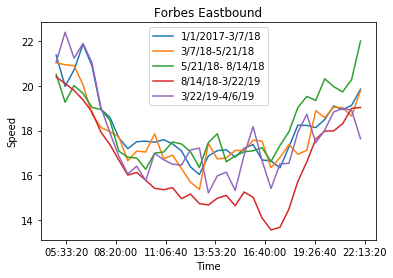

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(avg1a, label = '1/1/2017-3/7/18' )
plt.plot(avg1, label = '3/7/18-5/21/18' )
plt.plot(avg2 , label = '5/21/18- 8/14/18')
plt.plot(avg3, label = '8/14/18-3/22/19')
plt.plot(avg4,label='3/22/19-4/6/19')
plt.title('Forbes Eastbound')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Speed')

Text(0,0.5,'Speed')

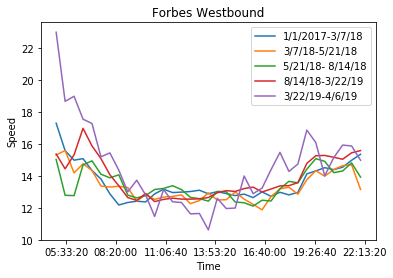

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(avg5a, label = '1/1/2017-3/7/18' )
plt.plot(avg5, label = '3/7/18-5/21/18' )
plt.plot(avg6 , label = '5/21/18- 8/14/18')
plt.plot(avg7, label = '8/14/18-3/22/19')
plt.plot(avg8,label='3/22/19-4/6/19')
plt.title('Forbes Westbound')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Speed')